# PART A

In [27]:
import tensorflow
tensorflow.__version__

'2.7.0'

In [28]:
# Initialize random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [29]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
pip install langdetect

     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c759b040caee3623886c81c69a881974d18f03b74603ebf9dac7d224f857570c
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [31]:
# Importing all required libraries
import pandas as pd
import numpy as np
import re, string
from langdetect import detect, detect_langs



from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
nltk.download('wordnet')

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# 1. Read and Analyse Dataset.

In [32]:
data = pd.read_csv('/content/drive/MyDrive/AI-ML/NLP Project/Dataset+-+blogtext.csv')
data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [34]:
print('Unique ids :' ,len(data['id'].unique()))
data['id'].unique()

Unique ids : 19320


array([2059027, 3581210, 3539003, ..., 3561647, 4260903, 1713845])

In [35]:
print('Unique dates :' ,len(data['date'].unique()))
data['date'].unique()

Unique dates : 2616


array(['14,May,2004', '13,May,2004', '12,May,2004', ..., '05,august,2004',
       '04,august,2004', '02,august,2004'], dtype=object)

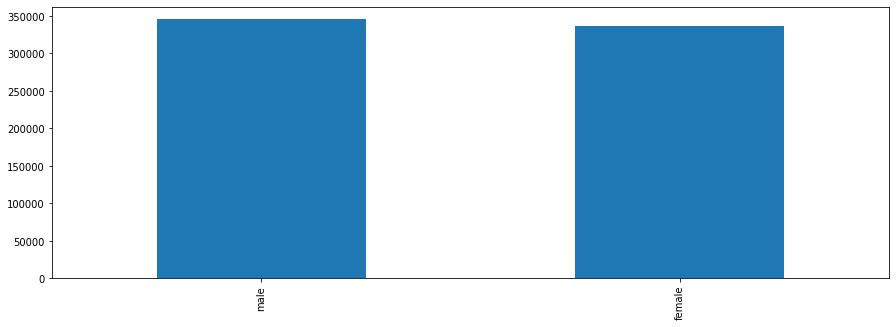

In [36]:
#Gender
data['gender'].value_counts().plot(kind='bar', figsize=(15,5))

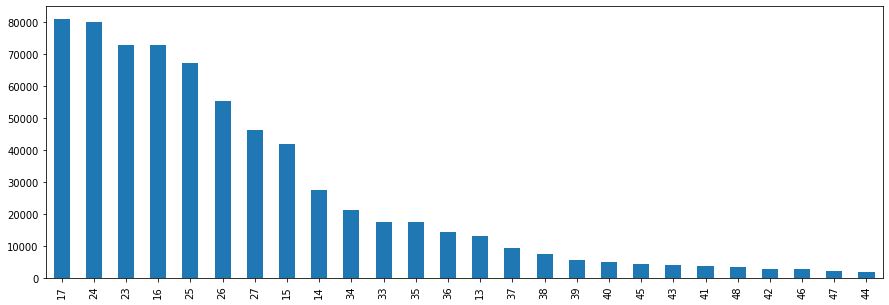

In [37]:
#Age
data['age'].value_counts().plot(kind='bar', figsize=(15,5))

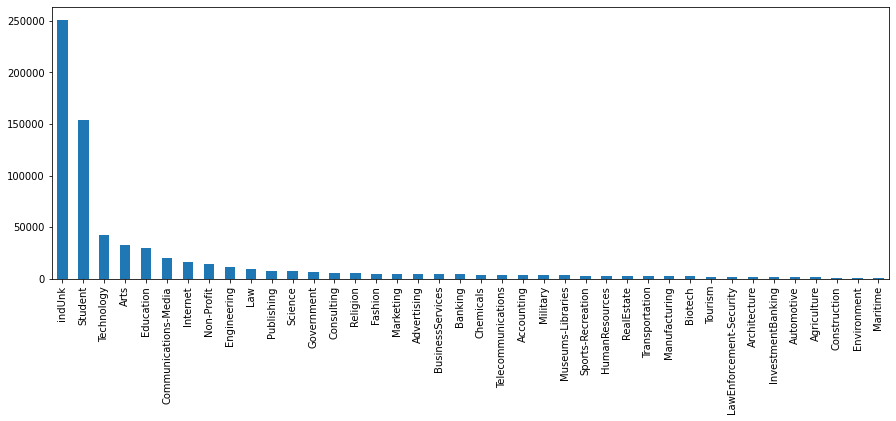

In [38]:
#Topics
data['topic'].value_counts().plot(kind='bar', figsize=(15,5))

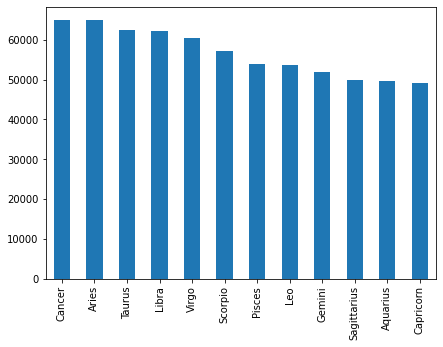

In [39]:
#sign
data['sign'].value_counts().plot(kind='bar', figsize=(7,5))

In [40]:
print('Unique topics :' ,len(data['topic'].unique()))
data['topic'].unique()

Unique topics : 40


array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Museums-Libraries', 'Accounting', 'Technology', 'Law',
       'Consulting', 'Automotive', 'Religion', 'Fashion', 'Publishing',
       'Marketing', 'LawEnforcement-Security', 'HumanResources',
       'Telecommunications', 'Military', 'Government', 'Transportation',
       'Architecture', 'Advertising', 'Agriculture', 'Biotech',
       'RealEstate', 'Manufacturing', 'Construction', 'Chemicals',
       'Maritime', 'Tourism', 'Environment'], dtype=object)

In [41]:
data['topic'].value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

Taking 10% data from each topic category to get a smaller dataset to work with

In [42]:
data = data.groupby("topic").sample(n=1000, replace=True,random_state=1).reset_index(drop=True)
data

,id,gender,age,topic,sign,date,text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als..."
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....
...,...,...,...,...,...,...,...
39995,2866266,male,13,indUnk,Taurus,"15,May,2004","anyway, i just woke up at 10:30 ..."
39996,4091963,female,39,indUnk,Leo,"30,June,2004",Giuliani to Cheney: 'Let's blast that ...
39997,91374,male,26,indUnk,Taurus,"21,March,2003",This just in from urlLink Apple : ...
39998,2250415,male,27,indUnk,Virgo,"08,July,2004",The Matrix Revolutions (WARNING The maj...


In [43]:
data['topic'].value_counts()

Accounting                 1000
Advertising                1000
LawEnforcement-Security    1000
Manufacturing              1000
Maritime                   1000
Marketing                  1000
Military                   1000
Museums-Libraries          1000
Non-Profit                 1000
Publishing                 1000
RealEstate                 1000
Religion                   1000
Science                    1000
Sports-Recreation          1000
Student                    1000
Technology                 1000
Telecommunications         1000
Tourism                    1000
Transportation             1000
Law                        1000
InvestmentBanking          1000
Internet                   1000
Chemicals                  1000
Agriculture                1000
Architecture               1000
Arts                       1000
Automotive                 1000
Banking                    1000
Biotech                    1000
BusinessServices           1000
Communications-Media       1000
HumanRes

### Clearly write outcome of data analysis


### Clean the Structured Data

#### Missing value analysis and imputation.

There's no imputing of missing values in NLP. Imputing can make sense in some cases with a numerical value but generally text is a diverse (unstructured data) data format and the concept of "most frequent text" to make any sense.

Hence we can either:
1. Leave the text empty. Most of the time an empty text can be represented like any other text value, e.g. as a TFIDF vector made of zeros.

2. Discard instances which have no text. For example in text classification no text means no input data at all, so there's no point performing the task for such cases.

3. Treating instances with no text as special cases based on the specifics of the task. For example such instances could be systematically assigned the majority class, if that makes sense for the task.

For this case, we identify the missing / blank entries and remove them completely

In [44]:
# This doesn't give any valuable information
data.isna().sum() 

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [45]:
# Here, we identify the row entries which are simple spaces and consider them as blank and remove them
data['emptystr'] = list(map(lambda x: not(x.isspace()), data['text']))

In [46]:
# Removing the rows with empty strings
data = data[data['emptystr'] == True]

# Removing the column that we created temporarily for this requirement
data = data.drop(['emptystr'], axis=1)

data.head()

,id,gender,age,topic,sign,date,text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als..."
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....


#### Eliminate Non-English textual data. 

Since the dataset has many entries with special characters and numeric data, we perform this step after the data cleaning since language detect dont work on such data.

Refer 1.B.ii after Step 2

# 2. Preprocess unstructured data to make it consumable for model training

### Removing special characters, numbers and whitespaces

In [47]:
def clean_str(string):
  try:   
    # Removing URLs 
    string = re.sub(r'https?:\/\/.*[\r\n]*', '', string) 

    # Removing special characters 
    string = re.sub(r'[\.;:,\?\"\'\/\=\\\-\(\)\*\&\@\$\#\^\%\~\!\+\_\{\}\[\]\|\<\>\`]','', string)

    # Removing only numeric data entries
    string = re.sub(r'[0-9]','',string)  

    # Removing leading and trailing whitespaces
    string = string.strip()

    # Remoing in between whitespaces
    words = string.strip().split()    
    words = [w for w in words if len(w)>=1]
    return " ".join(words)

  except:
    return ""

In [48]:
data['clean_text'] = data['text'].apply(clean_str)
data.head()

,id,gender,age,topic,sign,date,text,clean_text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...,This friday is just going to be packed up My c...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als...",so i love the show scrubs and i also love zach...
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...,ugh what a day I close on my house tomorrow It...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...,nbsp urlLink urlLink Hi everybody welcome to M...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....,Hey Gals Its been awhilehope yall are doing gr...


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39780 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          39780 non-null  int64 
 1   gender      39780 non-null  object
 2   age         39780 non-null  int64 
 3   topic       39780 non-null  object
 4   sign        39780 non-null  object
 5   date        39780 non-null  object
 6   text        39780 non-null  object
 7   clean_text  39780 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.7+ MB


### Eliminate non-english textual data (1.B.ii)

In [50]:
# Removing null strings from the dataset
nan_value = float("NaN")
data['clean_text'].replace("", nan_value, inplace=True)
data.dropna(subset = ["clean_text"], inplace=True)
data

,id,gender,age,topic,sign,date,text,clean_text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...,This friday is just going to be packed up My c...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als...",so i love the show scrubs and i also love zach...
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...,ugh what a day I close on my house tomorrow It...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...,nbsp urlLink urlLink Hi everybody welcome to M...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....,Hey Gals Its been awhilehope yall are doing gr...
...,...,...,...,...,...,...,...,...
39995,2866266,male,13,indUnk,Taurus,"15,May,2004","anyway, i just woke up at 10:30 ...",anyway i just woke up at and my father asked m...
39996,4091963,female,39,indUnk,Leo,"30,June,2004",Giuliani to Cheney: 'Let's blast that ...,Giuliani to Cheney Lets blast that Nomar guy I...
39997,91374,male,26,indUnk,Taurus,"21,March,2003",This just in from urlLink Apple : ...,This just in from urlLink Apple We wanted you ...
39998,2250415,male,27,indUnk,Virgo,"08,July,2004",The Matrix Revolutions (WARNING The maj...,The Matrix Revolutions WARNING The major plot ...


In [51]:
# data.head()

In [52]:
data.reset_index(inplace = True, drop = True)  
data

,id,gender,age,topic,sign,date,text,clean_text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...,This friday is just going to be packed up My c...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als...",so i love the show scrubs and i also love zach...
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...,ugh what a day I close on my house tomorrow It...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...,nbsp urlLink urlLink Hi everybody welcome to M...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....,Hey Gals Its been awhilehope yall are doing gr...
...,...,...,...,...,...,...,...,...
39719,2866266,male,13,indUnk,Taurus,"15,May,2004","anyway, i just woke up at 10:30 ...",anyway i just woke up at and my father asked m...
39720,4091963,female,39,indUnk,Leo,"30,June,2004",Giuliani to Cheney: 'Let's blast that ...,Giuliani to Cheney Lets blast that Nomar guy I...
39721,91374,male,26,indUnk,Taurus,"21,March,2003",This just in from urlLink Apple : ...,This just in from urlLink Apple We wanted you ...
39722,2250415,male,27,indUnk,Virgo,"08,July,2004",The Matrix Revolutions (WARNING The maj...,The Matrix Revolutions WARNING The major plot ...


In [53]:
#try
def detect_lang(text):
   try:
       return detect(text)
   except:
       return 'unknown'

In [54]:
data['lang_detect'] = data['clean_text'].apply(detect_lang)

English language entries 37938


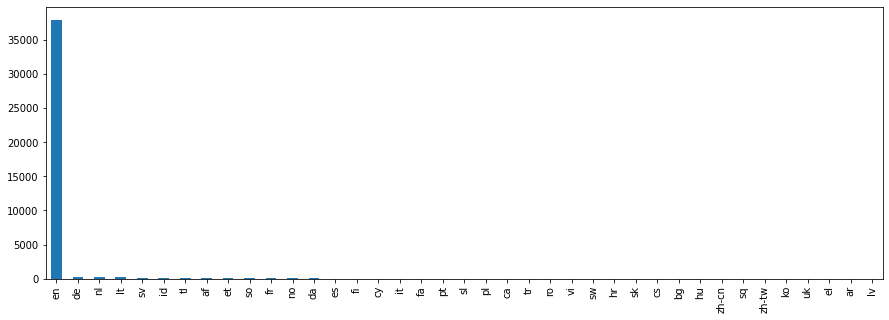

In [55]:
# Removing the rows for which either language could not be detected or is not english language
print('English language entries',len(data[data['lang_detect']=='en']))


# Let's see the distribution for all languages before eliminating them
data['lang_detect'].value_counts().plot(kind='bar', figsize=(15,5))

In [56]:
data = data[data['lang_detect'] == 'en']
data['lang_detect'].value_counts()

en    37938
Name: lang_detect, dtype: int64

In [57]:
# Dropping the additional column of lang_detect that we created temporarily for this requirement
data = data.drop(['lang_detect'], axis=1)
data.head()

,id,gender,age,topic,sign,date,text,clean_text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...,This friday is just going to be packed up My c...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als...",so i love the show scrubs and i also love zach...
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...,ugh what a day I close on my house tomorrow It...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...,nbsp urlLink urlLink Hi everybody welcome to M...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....,Hey Gals Its been awhilehope yall are doing gr...


In [58]:
data.reset_index(drop = True, inplace = True)

### Lower case all textual data

In [59]:
data['clean_text'] = data['clean_text'].apply(lambda s: s.lower())
data.head()

,id,gender,age,topic,sign,date,text,clean_text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...,this friday is just going to be packed up my c...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als...",so i love the show scrubs and i also love zach...
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...,ugh what a day i close on my house tomorrow it...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...,nbsp urllink urllink hi everybody welcome to m...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....,hey gals its been awhilehope yall are doing gr...


Stop words will be removed after tokenization

# Build a base Classification model

### X, y and Train-Test split

In [60]:
# Extracting dependent and independent variables
X = data.clean_text
y = data.topic

In [61]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [62]:
#Traing data
print(X_train.shape)
print(y_train.shape)

(28453,)
(28453,)


In [63]:
#Test Data
print(X_test.shape)
print(y_test.shape)

(9485,)
(9485,)


### Model Building and Performance Analysis

#### Model 1 : Using Count Vectorizer and KNN Model

In [64]:
def print_confusion_matrix(testY, predicted_test_y):
    mat = confusion_matrix(testY, predicted_test_y)

    plt.figure(figsize=(10, 10))
    sns.set()
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=np.unique(testY),
                yticklabels=np.unique(testY))

    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

In [65]:
# Countvectorizer and stop words removal
analyzer = CountVectorizer(stop_words='english').build_analyzer()
lemmatizer = WordNetLemmatizer()

In [66]:
#Function to lemm words
def get_lemmed_text(doc):
    return (lemmatizer.lemmatize(w) for w in analyzer(doc))

In [67]:
# import and instantiate CountVectorizer
vect1 = CountVectorizer(analyzer=get_lemmed_text)

In [68]:
#This will take few seconds
vect1.fit(X_train)

#Vocabulary
print('The size of the vocabulary is :',len(vect1.get_feature_names()))

The size of the vocabulary is : 127519


In [69]:
vect1.get_feature_names()

['aa',
 'aaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaahhhhhhhh',
 'aaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaahhh',
 'aaaaaaaaaaaaaahhh',
 'aaaaaaaaaaaaaarrrrrrrrrrrggggggggggghhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaaaahhhhhhhhhhhhhh',
 'aaaaaaaaaaaagh',
 'aaaaaaaaaaaah',
 'aaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaah',
 'aaaaaaaaaaahhhhhhh',
 'aaaaaaaaaaarrrrrrgggh',
 'aaaaaaaaaaauuugh',
 'aaaaaaaaaahhhhhh',
 'aaaaaaaaahhhhhhhhhhhhhhhh',
 'aaaaaaaaarg',
 'aaaaaaaaargh',
 'aaaaaaaaarrrrrrrggggggggghhhhhhhhhhhh',
 'aaaaaaaahhhhhhhhh',
 'aaaaaaaand',
 'aaaaaaaargh',
 'aaaaaaalive',
 'aaaaaaand',
 'aaaaaaanyways',
 'aaaaaahhhhhhh',
 'aaaaaand',
 'aaaaaargghh',
 'aaaaaarhgh',
 'aaaaaarrrggghhh',
 'aaaaaaw',
 'aaaaaghhhhh',
 'aaaaah',
 'aaaaahhhhh',
 'aaaaahhhhhh',
 'aaaaahhhhhhhh',
 'aaaaand',
 'aaaaanyway',
 'aaaaanyways',
 'aaaages',
 'aaaaggghhhhh',
 'aaaaggh',
 'aaaagh',
 'aaaah',
 'aaaahed',
 'aaaahhh',
 'a

In [70]:
#Convert Training text into Count Vectors
X_train_ct = vect1.transform(X_train)

In [71]:
#Size of Document Term Matrix
X_train_ct.shape

(28453, 127519)

In [72]:
#Convert testing text into Count Vectors
X_test_ct = vect1.transform(X_test)

In [73]:
# Size of Document Term Matrix
X_test_ct.shape

(9485, 127519)

In [74]:
# instantiate the model (with the default parameters)
knn = KNeighborsClassifier()

In [75]:
# fit the model with data (occurs in-place)
knn.fit(X_train_ct, y_train)

KNeighborsClassifier()

In [76]:
ypred_train_m1 = knn.predict(X_train_ct)

In [77]:
#Calculate accuracy on Training Dataset
metrics.accuracy_score(y_train, ypred_train_m1)

0.36484729202544547

In [78]:
#Calculate accuracy on Testing Dataset
ypred_test_m1 = knn.predict(X_test_ct)

In [79]:
#Calculate accuracy on Testing Dataset
metrics.accuracy_score(y_test, ypred_test_m1)

0.12894043226146548

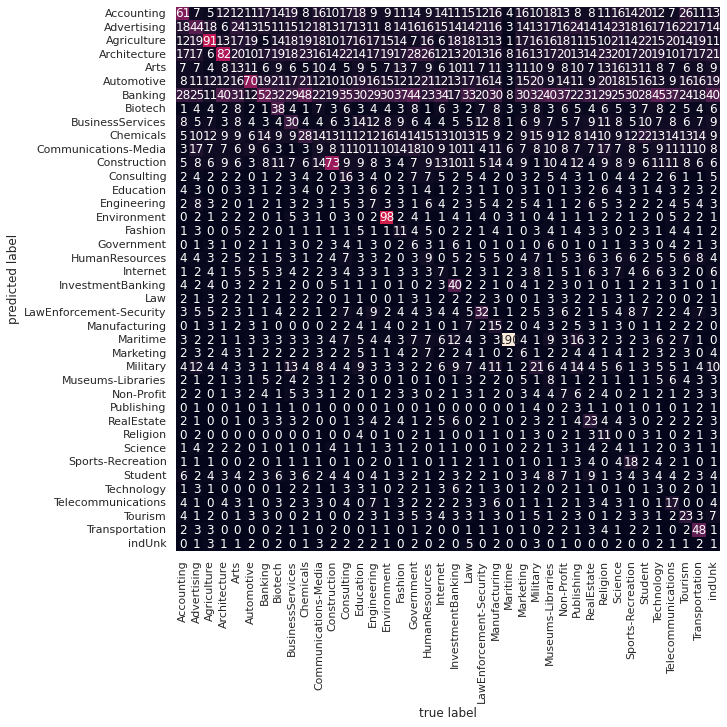

In [80]:
print_confusion_matrix(y_test, ypred_test_m1 )

*   Training accuracy : 0.36
*   Testing accuracy : 0.12



#### Model 2 : Using Count Vectorizer and SVC Model

In [81]:
#Train an SVM with default parameters
svc = SVC()
svc.fit(X_train_ct, y_train)

SVC()

In [82]:
ypred_train_m2 = svc.predict(X_train_ct)

In [83]:
#Calculate accuracy on Training Dataset
metrics.accuracy_score(y_train, ypred_train_m2)

0.5236354690190841

In [84]:
#Calculate accuracy on Testing Dataset
ypred_test_m2 = svc.predict(X_test_ct)

In [85]:
#Calculate accuracy on Test Dataset
metrics.accuracy_score(y_test, ypred_test_m2)

0.19314707432788614

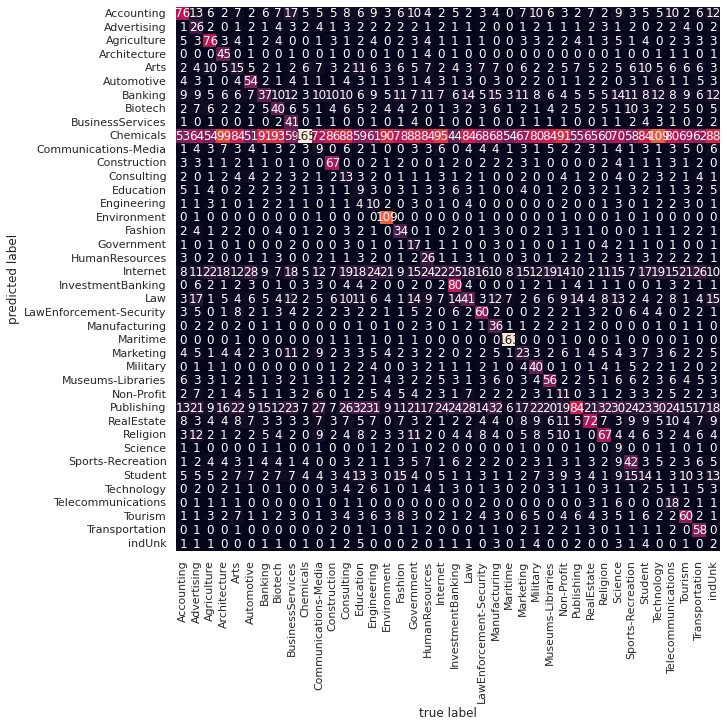

In [86]:
print_confusion_matrix(y_test, ypred_test_m2)

*   Training accuracy : 0.51
*   Testing accuracy : 0.19



#### Model 3 : Using TF-IDF Vectorizer and SVC/KNN Model

In [87]:
analyzer = TfidfVectorizer(stop_words='english').build_analyzer()
lemmatizer = WordNetLemmatizer()

In [88]:
lemm_tvectorizer = TfidfVectorizer(analyzer=get_lemmed_text)

In [89]:
lemm_tvectorizer.fit(X_train)

#Vocabulary
len(lemm_tvectorizer.get_feature_names())

127519

In [90]:
#Convert Training text into Count Vectors
X_train_ct = lemm_tvectorizer.transform(X_train)
X_test_ct = lemm_tvectorizer.transform(X_test)

In [91]:
#Train an SVM with default parameters
svc = SVC()
svc.fit(X_train_ct, y_train)

SVC()

In [92]:
ypred_train_m3 = svc.predict(X_train_ct)

In [93]:
#Calculate accuracy on Training Dataset
metrics.accuracy_score(y_train, ypred_train_m3)

0.9826380346536393

In [94]:
#Calculate accuracy on Testing Dataset
ypred_test_m3 = svc.predict(X_test_ct)

In [95]:
#Calculate accuracy on Test Dataset
metrics.accuracy_score(y_test, ypred_test_m3)

0.35340010542962574

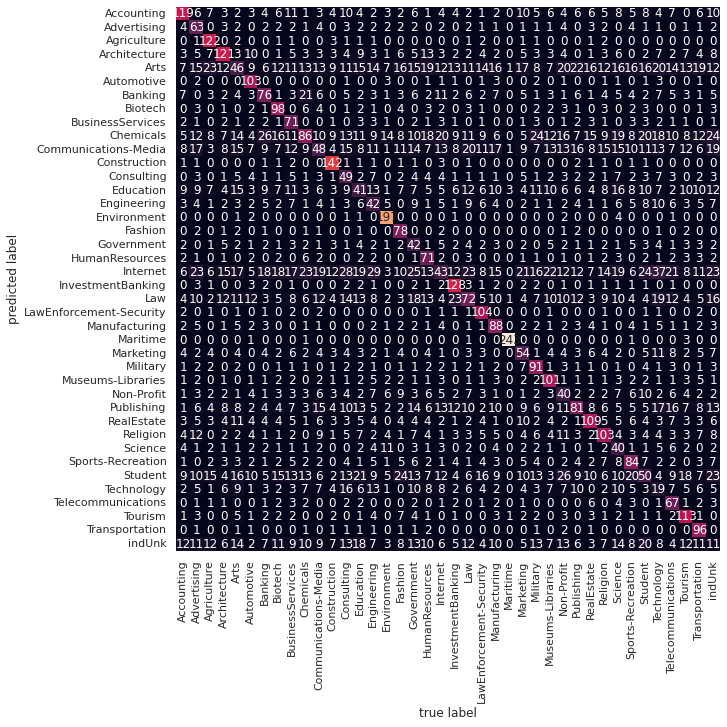

In [96]:
print_confusion_matrix(y_test, ypred_test_m3)

*   Training accuracy : 0.98
*   Testing accuracy : 0.35



In [97]:
# Countvectorizer and stop words removal
analyzer = TfidfVectorizer(stop_words='english').build_analyzer()
lemmatizer = WordNetLemmatizer()

In [98]:
# import and instantiate CountVectorizer
vect3 = TfidfVectorizer(analyzer=get_lemmed_text)

In [99]:
#This will take few seconds
vect3.fit(X_train)

#Vocabulary
print('The size of the vocabulary is :',len(vect3.get_feature_names()))

The size of the vocabulary is : 127519


In [100]:
#Convert Training text into Count Vectors
X_train_ct = vect3.transform(X_train)

In [101]:
#Convert testing text into Count Vectors
X_test_ct = vect3.transform(X_test)

In [102]:
parameter_candidates = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],                                         
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf']}

In [103]:
# Create a classifier object with the classifier and parameter candidates
clf_test = GridSearchCV(estimator=svc, param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf_test.fit(X_train_ct, y_train)  

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [104]:
# View the accuracy score
print('Best score for data:', clf_test.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',clf_test.best_estimator_.C) 
print('Best Kernel:',clf_test.best_estimator_.kernel)
print('Best Gamma:',clf_test.best_estimator_.gamma)

Best score for data: 0.32892817228448457
Best C: 10
Best Kernel: rbf
Best Gamma: 1


In [105]:
#Train an SVM with default parameters
svc_new = SVC(C=10, kernel='rbf', gamma=1)
svc_new.fit(X_train_ct, y_train)

SVC(C=10, gamma=1)

In [106]:
ypred_train_m3 = svc_new.predict(X_train_ct)

In [107]:
#Calculate accuracy on Training Dataset
metrics.accuracy_score(y_train, ypred_train_m3)

0.9910027062172706

In [108]:
#Calculate accuracy on Testing Dataset
ypred_test_m3 = svc_new.predict(X_test_ct)

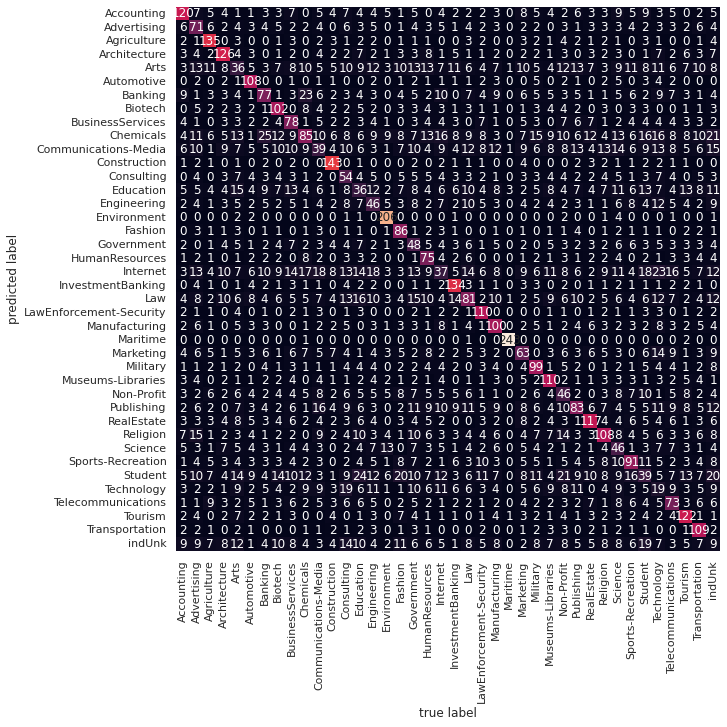

In [109]:
print_confusion_matrix(y_test, ypred_test_m3)

# PART B

In [123]:
import numpy as np
import nltk
import random
import string

import bs4 as bs
import urllib.request
import re

from nltk.stem.porter import PorterStemmer

import json

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [124]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
with open('/content/drive/MyDrive/AI-ML/NLP Project/GL+Bot.json', 'r') as f:
  intents = json.load(f)

In [126]:
def tokenize(sentence):
  return nltk.word_tokenize(sentence)

In [127]:
stemmer = PorterStemmer()
def stem(word):
  return stemmer.stem(word.lower())  

In [128]:
def bag_of_words(tokenized_sentence, corpus):
  tokenized_sentence = [stem(w) for w in tokenized_sentence]
  
  bag = np.zeros(len(corpus), dtype=np.float32)
  for idx,w, in enumerate(corpus):
    if w in tokenized_sentence:
      bag[idx] = 1.0

  return bag


In [129]:
corpus = []
tags = []
xy = []

for intent in intents['intents']:
  tag = intent['tag']
  tags.append(tag)
  for pattern in intent['patterns']:
    w = tokenize(pattern)
    corpus.extend(w)
    xy.append((w, tag))


In [130]:
# We will avoid the following characters from the sentences
punctuations = ['?','!','.',',']

In [131]:
corpus = [stem(w) for w in corpus if w not in punctuations]
corpus = sorted(set(corpus))
tags = sorted(set(tags))

In [132]:
X_train = []
y_train = []

for (pattern_sentence, tag) in xy:
  bag = bag_of_words(pattern_sentence, corpus)
  X_train.append(bag)

  label = tags.index(tag)
  y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [133]:
class ChatDataset(Dataset):
  def __init__(self):
    self.n_samples = len(X_train)
    self.x_data = X_train
    self.y_data = y_train

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return self.n_samples


In [134]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.l2 = nn.Linear(hidden_size, hidden_size) 
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        # no activation and no softmax at the end
        return out

In [135]:
#Hyperparameters
num_epochs = 1000
batch_size = 8
learning_rate = 0.001
input_size = len(X_train[0])
hidden_size = 8
output_size = len(tags)

In [136]:
dataset = ChatDataset()
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=0)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [137]:
model = NeuralNet(input_size, hidden_size, output_size)

In [138]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [139]:
# Train the model
for epoch in range(num_epochs):
    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(dtype=torch.long).to(device)
        
        # Forward pass
        outputs = model(words)
        # if y would be one-hot, we must apply
        # labels = torch.max(labels, 1)[1]
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 100 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0400
Epoch [200/1000], Loss: 0.0066
Epoch [300/1000], Loss: 0.0012
Epoch [400/1000], Loss: 0.0002
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


In [140]:
data = {
"model_state": model.state_dict(),
"input_size": input_size,
"hidden_size": hidden_size,
"output_size": output_size,
"corpus": corpus,
"tags": tags
}

In [141]:
FILE = "data.pth"
torch.save(data, FILE)

In [142]:
input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
corpus = data['corpus']
tags = data['tags']
model_state = data["model_state"]

In [143]:
model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
model.eval()

NeuralNet(
  (l1): Linear(in_features=154, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=8, bias=True)
  (l3): Linear(in_features=8, out_features=8, bias=True)
  (relu): ReLU()
)

In [144]:
bot_name = "Olympus"
print("Let's chat! (type 'quit' to exit)")
while True:
    # sentence = "do you use credit cards?"
    sentence = input("You: ")
    if sentence == "quit":
        break

    sentence = tokenize(sentence)
    X = bag_of_words(sentence, corpus)
    X = X.reshape(1, X.shape[0])
    X = torch.from_numpy(X).to(device)

    output = model(X)
    _, predicted = torch.max(output, dim=1)

    tag = tags[predicted.item()]

    probs = torch.softmax(output, dim=1)
    prob = probs[0][predicted.item()]
    if prob.item() > 0.75:
        for intent in intents['intents']:
            if tag == intent["tag"]:
                print(f"{bot_name}: {random.choice(intent['responses'])}")
    else:
        print(f"{bot_name}: I do not understand...")

Let's chat! (type 'quit' to exit)
You: Hello
Olympus: Hello! how can i help you ?
You: Need help in machine learning
Olympus: Link: Machine Learning wiki 
You: BUt I have doubt in deep learning also
Olympus: Link: Neural Nets wiki
You: Not helping with the correct link man!!
Olympus: Link: Olympus wiki
You: You are an idiot
Olympus: I hope I was able to assist you, Good Bye
You: No not help done
Olympus: Tarnsferring the request to your PM
You: Thanks that helps
Olympus: I hope I was able to assist you, Good Bye
You: Yes
Olympus: I do not understand...
You: Ok bye
Olympus: I do not understand...
You: Thank you bye
Olympus: I hope I was able to assist you, Good Bye
You: quit
